In [1]:
from generate_data import generate_data
import numpy as np
from tqdm import trange

In [2]:
def calculate_cluster_variance(data: np.ndarray, verbose: bool = True) -> np.ndarray:
    n_TIs = data.shape[0]
    n = data.shape[1]

    centroids = data.mean(axis=2) # center of each cluster

    variances = np.zeros((n_TIs, n))

    range_func = trange if verbose else range
    for i in range_func(n_TIs):
        for j in range(n):
            variances[i, j] = np.mean([np.linalg.norm(point - centroids[i, j])**2 for point in data[i, j]])

    variances = variances.mean(axis=1)

    return variances

In [3]:
TIs = range(208, 1000, 16)
n = 1000
m = 10000

In [7]:
#data = generate_data(TIs, n, m, flip = False, normalize_data = False)

data = np.load("results/m=10000;postprocess;cv.npy")

# only T_21 and T_22 are needed for this method
data2 = data[:,:,:,2:4]

In [9]:
variances = calculate_cluster_variance(data2)

100%|██████████| 50/50 [19:16<00:00, 23.14s/it]


(0.0, 250.0)

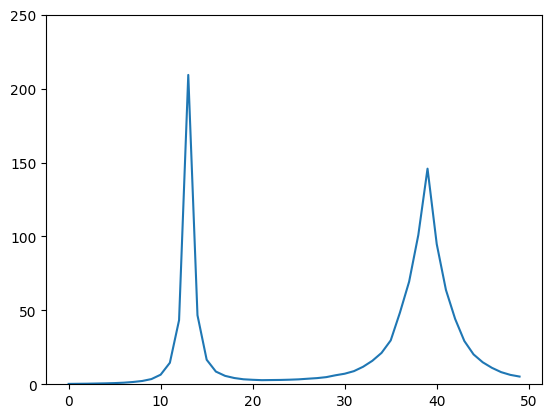

In [ ]:
import matplotlib.pyplot as plt
plt.plot(variances)
plt.ylim(0, 250)